# Step by step SSD Detection with OPENCV

This notebook is prepared for a quick review of object detection code with SSD model. I will show just basic steps and explain some portion of code. Architecture of SSD is out of consept. For details, original images and original codes; you can check the reference links.

First we should load our packages...

In [ ]:
import numpy as np
import argparse
import cv2

Then we should make a list with class names. The model was trained according to these names, so you should be careful about the order of names. The model will just return an index value which we will use this index value to understand 'what model detects'. 

In [ ]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

When model detect an object, we will show this detection with a rectangle. For a good visualization, each class should have a color. For this purpose, we should prepare a numpy array. The shape of array should be (number of class,3). Because of the number of channel (RGB), we should have 3 number for each class between 0 and 255.

In [ ]:
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
print(COLORS)
print(COLORS.shape)

Now let's load our model. For this purpose we use dnn module of opencv. It requires prototxt and caffemodel. If you need more details about this module, you should check documentation.

In [ ]:
# load our serialized model from disk
print("[INFO] loading model...")
proto_path='MobileNetSSD_deploy.prototxt.txt'
model_path='MobileNetSSD_deploy.caffemodel'
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
print(net)

By using opencv, we will load our image and resize it. Then you should take the dimension information, because the model will return coordinations of bounding box in scaled. We will need to multiply them with image dimensions to show results correctly.

In [ ]:
image = cv2.imread('dog1.jpg')
image=cv2.resize(image,(800,600))
(h, w) = image.shape[:2]

In [ ]:
#prepare image for network
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# pass the blob through the network and obtain the detections
net.setInput(blob)
detections = net.forward()

We can't put the image directly into model. Because of that reason we prepare our input as a blob. The parameters in cv2.dnn.blobFromImage() should be selected with respect to model. For example in our case, we use SSD300x300 model and the dimensions of blob will prepare according to this.

If you read notebook carefully, you may ask 'why i made 2 resizing operation?'. The first resizing operation is just for showing results clearly. The dimensions of my test images are very high and it is hard to use in that dimensions. The second resizing operation is for preparing blob.

Now let's put the blob as an input and see what we get.The results are in 'detections'.  

In [ ]:
print(detections)
print(type(detections))
print(detections.shape)

As you can see, there are lots of zeros in detections. Just the first row has some values different from zero. These values are :
* The second one(yellow) is index of class.From CLASSES list, we can see 'what model detects'
* The third one(blue) is probability of class.
* The least four values are the dimensions of bounding box(start x,start y,end x, end y)

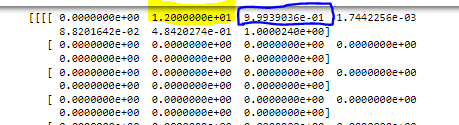



With these informations and basic array operation, Let's draw 'what our model detected'.

In [ ]:
for i in np.arange(0, detections.shape[2]):
    # we will check every detections and take their confidence values
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is bigger than 0.7

    if confidence > 0.7:

        class_id = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # to print and show the prediction
        label = "{}: {:.2f}%".format(CLASSES[class_id], confidence * 100)
        print("Detection result----> {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[class_id], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[class_id], 2)

# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

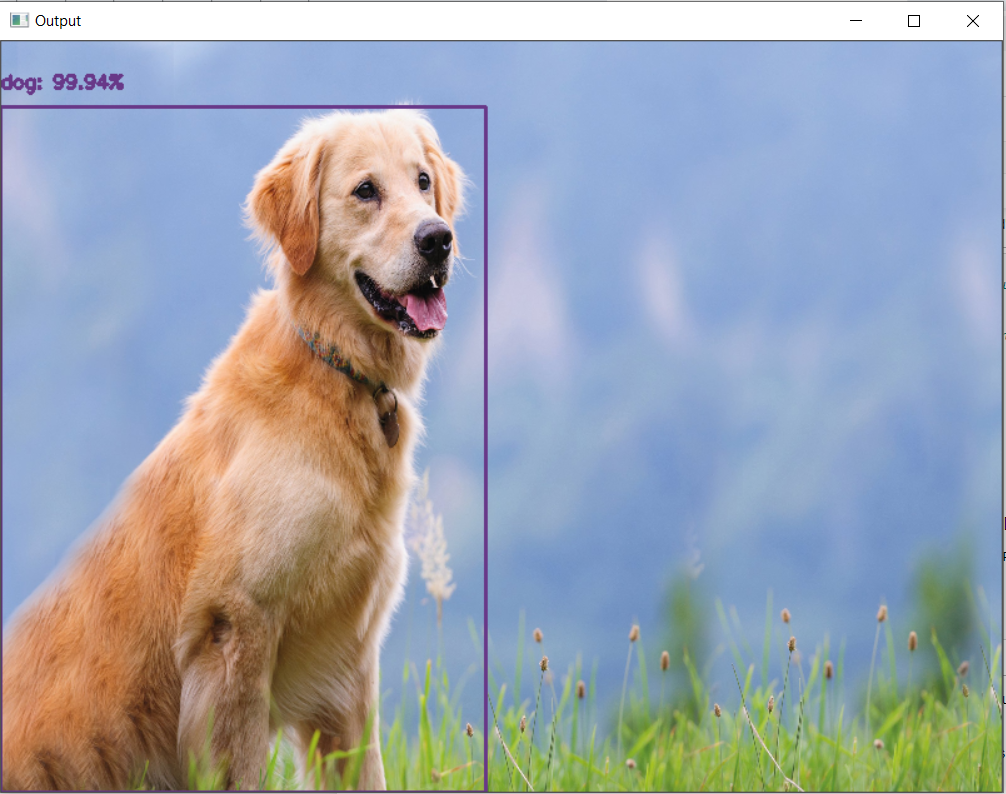

Now let's see what our model returns when there are more than one objects. For this purpose, we will load a new image, prepare it for model and check the 'detections'. 

At this time, we have more than one row with significant values. If we take these values and apply same method for showing result, we will see two bounding box around two cars.

In [ ]:
image = cv2.imread('car1.jpg')
image=cv2.resize(image,(800,600))
(h, w) = image.shape[:2]
#prepare image for network
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# pass the blob through the network and obtain the detections
net.setInput(blob)
detections = net.forward()
print(detections)
print(type(detections))
print(detections.shape)

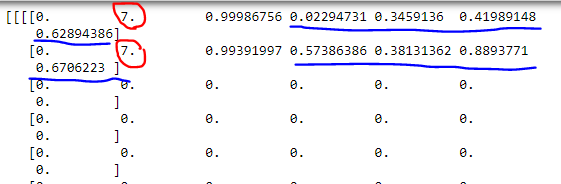

Our model detects two objects this time. Both of them belong to same class. Let's see 'What our model detect'.

In [ ]:
for i in np.arange(0, detections.shape[2]):
    # we will check every detections and take their confidence values
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is bigger than 0.7

    if confidence > 0.7:

        class_id = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # to print and show the prediction
        label = "{}: {:.2f}%".format(CLASSES[class_id], confidence * 100)
        print("Detection result----> {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[class_id], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[class_id], 2)

# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

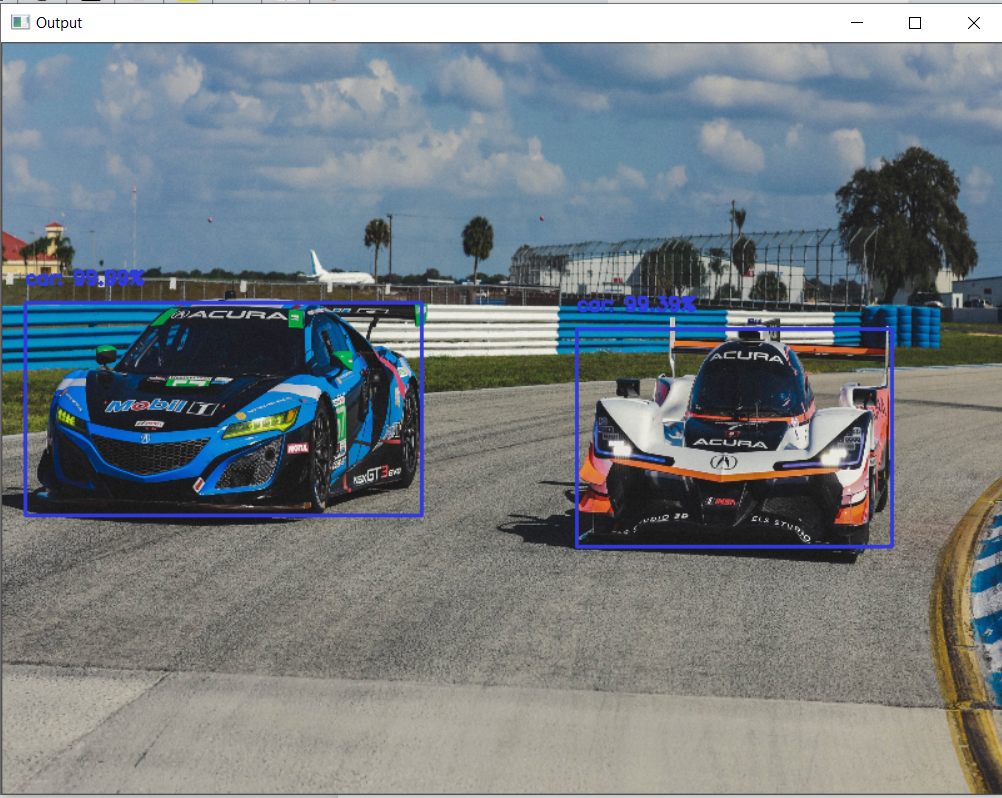

The model detected two cars with a high confidence score.

When you search for SSD detection in image, you can find lots of different codes. I just took an example and tried yo explain 'what our code does'. I hope I have mentioned important points and make it clear for you. Thank you for your time.